<a href="https://colab.research.google.com/github/subramanian72/Final-Project/blob/main/Twittersentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries used
import re
import pickle
import numpy as np
import pandas as pd

#Plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
m_cols  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('twitter_new.csv', encoding="latin-1", names=m_cols)

In [ ]:
df.shape

(582787, 6)

In [ ]:
df = df[['sentiment','text']].head(10000)

In [ ]:
df.shape

(10000, 2)

<ipython-input-65-64724797bf0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace(4,1)


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

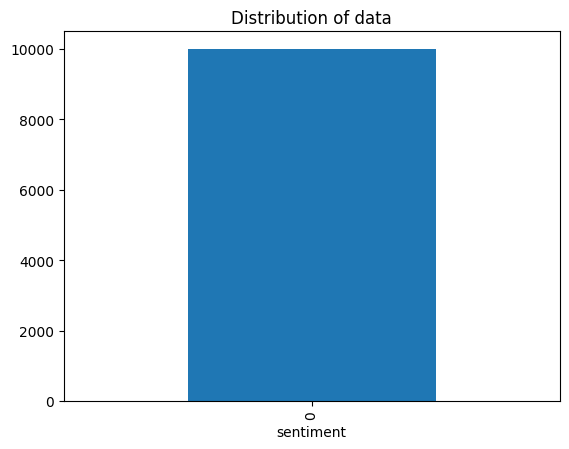

In [ ]:
# Removing the unnecessary columns and taken first 1000 rows.
df = df[['sentiment','text']]
# Replacing the values to ease understanding.
df['sentiment'] = df['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

In [ ]:
df.shape

(10000, 2)

In [ ]:
df.head(1000)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
995,0,@dkoenigs thanks man. I'm so very grateful. ...
996,0,@t_wolfe i miss u too. i'm totally comin back...
997,0,@sniffinglue ohhh. I love it. ps I'm sad we di...
998,0,And somehow I still end up in this place


In [ ]:
#cleaning the text

#Function to clean the text
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #replace @mentions
  text = re.sub(r'#','',text) #replace '#' symbol
  text = re.sub(r'RT[\s]+','',text) #replace RT
  text = re.sub(r'https?:\/\/\S+','',text) #replace https

  return text

#Cleaning the text
df['text'] = df['text'].apply(cleanTxt)

df

,sentiment,text
0,0,"- Awww, that's a bummer. You shoulda got Da..."
1,0,is upset that he can't update his Facebook by ...
2,0,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
9995,0,Aww that's sad
9996,0,stupid dvds stuffing up the good bits in jaws.
9997,0,_Sephy No. Only close friends and family I'm a...
9998,0,CRAP! After looking when I last tweeted... WHY...


In [ ]:
from textblob import TextBlob

#create function to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

df

,sentiment,text,Subjectivity,Polarity
0,0,"- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667
1,0,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,0,I dived many times for the ball. Managed to s...,0.500000,0.500000
3,0,my whole body feels itchy and like its on fire,0.400000,0.200000
4,0,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000
...,...,...,...,...
9995,0,Aww that's sad,0.950000,-0.100000
9996,0,stupid dvds stuffing up the good bits in jaws.,0.800000,-0.050000
9997,0,_Sephy No. Only close friends and family I'm a...,0.966667,-0.200000
9998,0,CRAP! After looking when I last tweeted... WHY...,0.388889,-0.291667


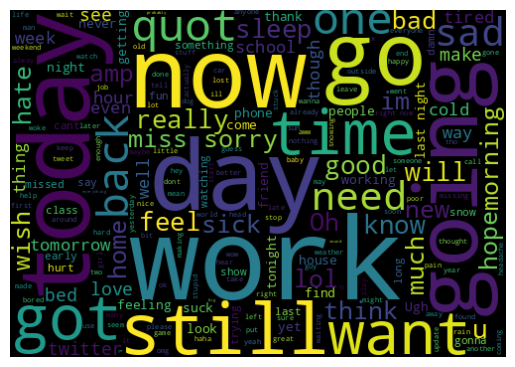

In [ ]:
#Plot the word cloud
allwords = ' '.join([txt for txt in df['text']])
wordcloud = WordCloud(width=500, height=350, random_state=21, max_font_size=115).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#function to compute Neagative, Neutral, Positive
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df


,sentiment,text,Subjectivity,Polarity,Analysis
0,0,"- Awww, that's a bummer. You shoulda got Da...",0.633333,0.216667,Positive
1,0,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,0,I dived many times for the ball. Managed to s...,0.500000,0.500000,Positive
3,0,my whole body feels itchy and like its on fire,0.400000,0.200000,Positive
4,0,"no, it's not behaving at all. i'm mad. why am...",1.000000,-0.625000,Negative
...,...,...,...,...,...
9995,0,Aww that's sad,0.950000,-0.100000,Negative
9996,0,stupid dvds stuffing up the good bits in jaws.,0.800000,-0.050000,Negative
9997,0,_Sephy No. Only close friends and family I'm a...,0.966667,-0.200000,Negative
9998,0,CRAP! After looking when I last tweeted... WHY...,0.388889,-0.291667,Negative


In [ ]:
#Print all the positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['text'][i])
    # print()
    j = j+1


1)   - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
2)  I dived many times for the ball. Managed to save 50%  The rest go out of bounds
3) my whole body feels itchy and like its on fire 
4)  not the whole crew 
5)  hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
6)  i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.
7)  ahh ive always wanted to see rent  love the soundtrack!!
8)  i was out most of the day so didn't get much done 
9) ooooh.... LOL  that leslie.... and ok I won't do it again so leslie won't  get mad again 
10) some1 hacked my account on aim  now i have to make a new one
11)  awe i love you too!!!! 1 am here  i miss you
12) Bed. Class 8-12. Work 12-3. Gym 3-5 or 6. Then class 6-10. Another day that's gonna fly by. I miss my girlfriend 
13) really don't feel like getting up today... but got to study to for tomorrows practical exam... 
14)  Awww 

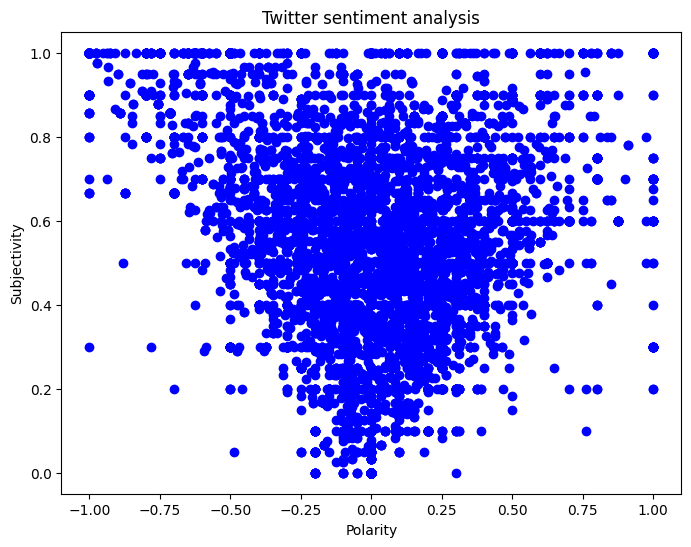

In [ ]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title("Twitter sentiment analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
#get the percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round((ptweets.shape[0] / df.shape[0]) * 100 ,1)

30.7

In [ ]:
#get the percentage of Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']

round((ntweets.shape[0] / df.shape[0]) * 100 ,1)

33.4

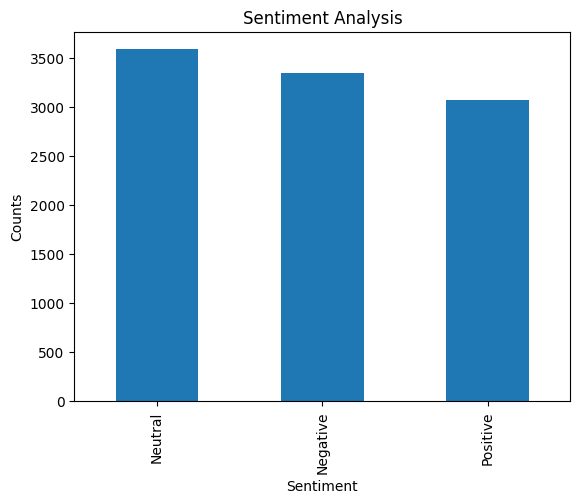

In [ ]:
#show the value counts
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()